# Price prediction apartments in Munich 🇩🇪

## 1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 2 Load and clean the data

In [2]:
df = pd.read_csv("listings.csv")

In [3]:
# Select relevant columns
df = df[['price', 'room_type', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']]

In [4]:
# Convert prices to numeric values
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/4b/l2tpw7fx031642n623sc332c0000gn/T/ipykernel_21534/3128735537.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [5]:
# Remove null values
df = df.dropna()

In [6]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

# 3 Data exploration with graphs


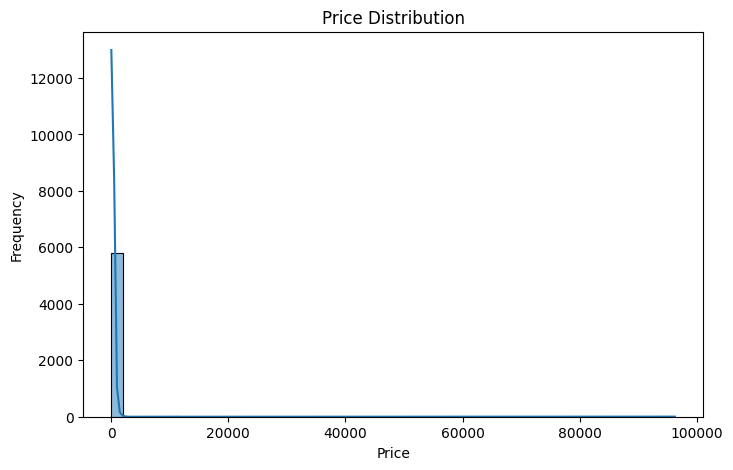

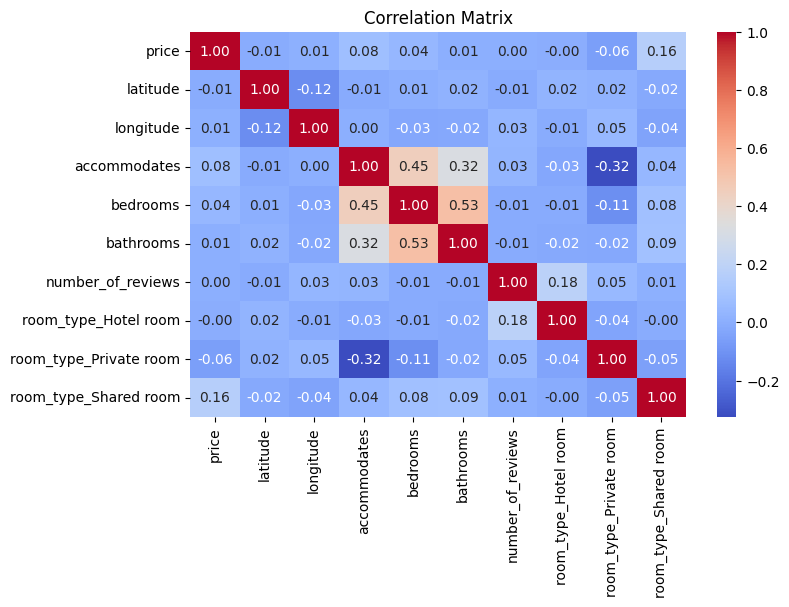

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 4 Separate predictor variables (X) and target variable (y)


In [9]:
X = df.drop(columns=['price'])
y = df['price']

# 5 Split into training and test data


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6 Train Random Forest model


In [13]:
modelo = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
modelo.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

# 7 Evaluate model


In [14]:
y_pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 174.39
RMSE: 1803.10


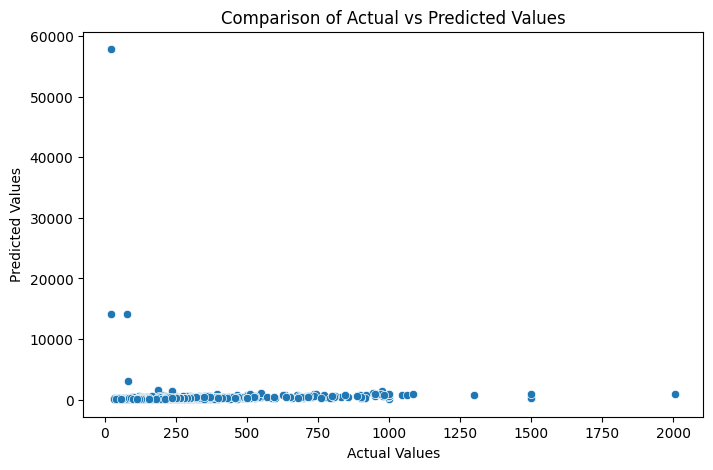

In [15]:
# Display graph comparing actual and predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of Actual vs Predicted Values")
plt.show()

# 6 Save trained model

In [16]:
joblib.dump(modelo, "modelo_random_forest.pkl")
print("Model saved successfully.")

Model saved successfully.


# 7 Make a prediction with new data

In [17]:
nueva_propiedad = pd.DataFrame(columns=X_train.columns)
nueva_propiedad.loc[0] = [48.1351, 11.5820, 3, 1, 1, 15, 1, 0, 0]  # Adjust according to your data
nueva_propiedad = nueva_propiedad.fillna(0)  # Ensure all columns match


In [18]:
# Load trained model and predict
modelo_cargado = joblib.load("modelo_random_forest.pkl")
prediccion_precio = modelo_cargado.predict(nueva_propiedad)
print(f"Estimated rental price: {prediccion_precio[0]:.2f} euros")


Estimated rental price: 297.01 euros
